# This notebook is to perform the Exploratory Data Analysis.

First we have to import the necessary libraries.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we have to read the dataset and print it to have an overall view of it.

In [42]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Let us see the data type of each column in the dataset.

In [43]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Next let us see the number of null values in each column.

In [44]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values in the "native.country" and "occupation" columns with data type have been filled with just "?".

Let us check if these columns have the "?" in them.

In [45]:
df['occupation'].unique() 

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [46]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

This proves that there are in fact null values in these columns.

These can be handled using techniques such as Simple Inputation. However, this would cause a bias in the dataset towards that specific variable.

Since we have a comparatively large dataset, these rows could be removed.

In [ ]:
df[df=='?'] = np.nan # dropping the rows with "?"
df = df.dropna(axis=0)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


It could be seen that the number of rows drops from 32561 to 30162.

Next let us see the possible values of the categorical columns.

In [ ]:
from collections import Counter

workclass_vals = dict(Counter(df['workclass'])).keys()
nationality_vals = dict(Counter(df['native.country'])).keys()
education_vals = dict(Counter(df['education'])).keys()
maritial_status_vals = dict(Counter(df['marital.status'])).keys()
occupation_vals = dict(Counter(df['occupation'])).keys()
relationship_vals = dict(Counter(df['relationship'])).keys()
race_vals = dict(Counter(df['race'])).keys()
sex_vals = dict(Counter(df['sex'])).keys()

# printing all the values for each column
print("Workclass: ", list(workclass_vals), '\n')
print("Nationality: ", list(nationality_vals), '\n')
print("Education levels: ", list(education_vals), '\n')
print("Maritial Status: ", list(maritial_status_vals), '\n')
print("Occupation: ", list(occupation_vals), '\n')
print("Relationship: ", list(relationship_vals), '\n')
print("Race: ", list(race_vals), '\n')
print("Sex: ", list(sex_vals), '\n')

Workclass:  ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay'] 

Nationality:  ['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'] 

Education levels:  ['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc', '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'] 

Maritial Status:  ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] 

Occupation:  ['Exec-

Next to analyze the distribution and make visualizations, a few plots could be drawn based on the dataset.

([<matplotlib.patches.Wedge at 0x1330c6b6f90>,
 [Text(0.09958027680817719, -1.0954833492439795, '<=50K'),
  Text(-0.09958032809145312, 1.0954833445822894, '>50K')],
 [Text(0.054316514622642094, -0.5975363723148979, '75.1%'),
  Text(-0.05431654259533806, 0.5975363697721577, '24.9%')])

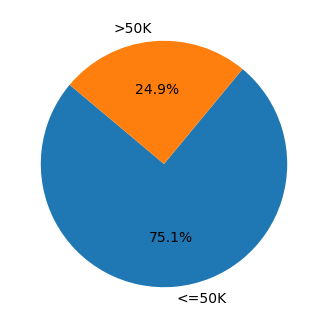

In [ ]:
income_counts = df['income'].value_counts() # getting the number of occcurences for each unique value in the "income" column

# a pie chart is plotted to see for any imbalances in the output column
plt.figure(figsize=(4,4))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)

This displays an imbalance in the dataset as there is 75.1% occurence of one category while the other category has an occurence of only 24.9%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '?'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Machine-op-inspct'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Adm-clerical'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Handlers-cleaners'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Farming-fishing'),
  Text(11, 0, 'Tech-support'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

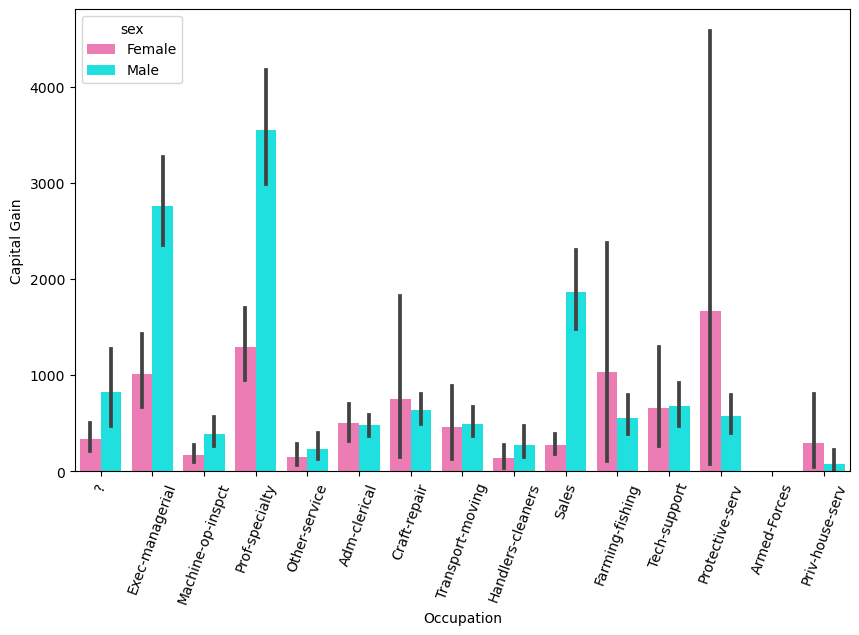

In [62]:
# plotting a figure to see the change of capital gain with the change in occupation for each sex.

# Define a custom color palette
color_palette = {"Male": "cyan", "Female": "hotpink"}
plt.figure(figsize=(10,6))
sns.barplot(x="occupation", y="capital.gain", data=df, hue="sex", palette=color_palette)
plt.xlabel("Occupation")
plt.ylabel("Capital Gain")
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

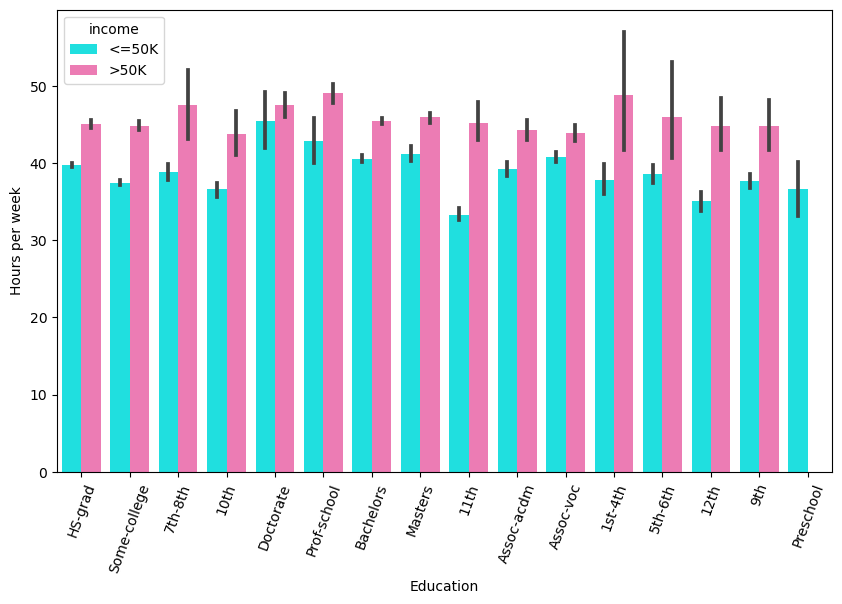

In [60]:
# plotting a figure of education against the hours per week based on the income.

# Define a custom color palette
color_palette = {"<=50K": "cyan", ">50K": "hotpink"}
plt.figure(figsize=(10,6))
sns.barplot(x="education", y="hours.per.week", data=df, hue="income", palette=color_palette)
plt.xlabel("Education")
plt.ylabel("Hours per week")
plt.xticks(rotation=70)

This provides an overall summary on our dataset. We can note the below points regarding the dataset.

* The dataset had 2,399 null values in the form "?" in the "native.country" and "occupation" columns which were dropped. 

* There is an imbalance in the dataset where more than 75% of the outcome is <=50K.

* A few more bar plots were plotted expecting additional information regarding the dataset, however, not much of meaningful trends could be obtained.